In [280]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
%matplotlib inline

In [33]:
data = pd.read_csv('./data/ATP.csv')

In [34]:
data_backup = data.copy()

In [35]:
for col in data.columns:
    print(col)

best_of
draw_size
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_ace
l_bpFaced
l_bpSaved
l_df
l_svpt
loser_age
loser_entry
loser_hand
loser_ht
loser_id
loser_ioc
loser_name
loser_rank
loser_rank_points
loser_seed
match_num
minutes
round
score
surface
tourney_date
tourney_id
tourney_level
tourney_name
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
w_ace
w_bpFaced
w_bpSaved
w_df
w_svpt
winner_age
winner_entry
winner_hand
winner_ht
winner_id
winner_ioc
winner_name
winner_rank
winner_rank_points
winner_seed


In [52]:
data.shape

(169690, 50)

In [37]:
data.head(5)

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN


## Création de la feature 'tourney_date_pt' : Conversion de 'tourney_date', type int en datetime 

In [53]:
print(data.tourney_date.head(5))
print(data.tourney_date.tail(5))
#ça commence en 1968 ... On garde les 10 dernières années

0    19680119
1    19680119
2    19680119
3    19680119
4    19680119
Name: tourney_date, dtype: int64
169685    20190225
169686    20190225
169687    20190225
169688    20190225
169689    20190225
Name: tourney_date, dtype: int64


In [40]:
## Conersion d'int en datetime type (Python)
data['tourney_date_pt'] = data['tourney_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

### On garde sur les entrées sur les 10 dernières années 

In [55]:
### On recherche le max (càd la date du dernier tournoi enregistrer dans la base de données)
data['tourney_date_pt'].max()

Timestamp('2019-02-25 00:00:00')

In [56]:
# Nous gardons donc les tournois après le 24 Février 2009 (cf. 10 ans + 1 jour)
## Note : Amélioration à faire pour que le calcul de 10 ans + 1 jours sur le max soit automatique
start_tourney_date = datetime(2009,2,24,23,59,59)

In [44]:
### On applique un filtre
df_10_last_years = data[data['tourney_date_pt'] > start_tourney_date]

In [57]:
### Debug
print('Original shape :\t\t',data.shape[0])
print('10 last years filter shape :\t',df_10_last_years.shape[0])

Original shape :		 169690
10 last years filter shape :	 29635


## Exploration sur la features 'matches' 

In [250]:
df_sub_select_nb_win = df_10_last_years[['winner_id','winner_name']]
df_sub_select_nb_loss = df_10_last_years[['loser_id','loser_name']]

In [251]:
test_1 = df_sub_select_nb_win.groupby('winner_name').agg('count').reset_index()
test_2 = df_sub_select_nb_loss.groupby('loser_name').agg('count').reset_index()

## Debug
#pd.value_counts(df_sub_select_nb_win['winner_name'].values, sort=True)
#pd.value_counts(df_sub_select_nb_loss['loser_name'].values, sort=True)

In [252]:
test_1['nb_win'] = test_1['winner_id']
test_2['nb_loss'] = test_2['loser_id']

In [253]:
test_1 = test_1.drop('winner_id', axis = 1)
test_2 = test_2.drop('loser_id', axis = 1)

In [254]:
df_merged = pd.merge(test_1, test_2, left_on = 'winner_name', right_on = 'loser_name', how = 'outer')

In [255]:
df_merged['nb_win'] = df_merged['nb_win'].fillna(0)
df_merged['nb_loss'] = df_merged['nb_loss'].fillna(0)
df_merged['nb_total'] = df_merged['nb_win'] + df_merged['nb_loss'] 

In [256]:
df_merged['player_name'] = df_merged['winner_name']
df_merged = df_merged.drop(['winner_name','loser_name'],axis=1)
df_merged = df_merged.dropna(subset=['player_name'])

In [257]:
## Debug
print(df_merged.head(5))
print(df_merged.tail(5))

   nb_win  nb_loss  nb_total              player_name
0     1.0      2.0       3.0  Abd Hazli Bin Zainuddin
1     4.0      4.0       8.0          Abdullah Maqdas
2     5.0      5.0      10.0             Adam Kellner
3     6.0      9.0      15.0            Adam Pavlasek
4     1.0      0.0       1.0            Adam Thompson
     nb_win  nb_loss  nb_total    player_name
871     4.0      4.0       8.0   Yuri Schukin
872    19.0     39.0      58.0       Ze Zhang
873     4.0      9.0      13.0         Zhe Li
874     4.0      3.0       7.0  Zhizhen Zhang
875     2.0      3.0       5.0  Zsombor Piros


In [258]:
df_merged['percent_win'] = (df_merged['nb_win']*100)/df_merged['nb_total']
df_merged['percent_loss'] = (df_merged['nb_loss']*100)/df_merged['nb_total']

In [260]:
df_merged = df_merged.sort_values(by=['percent_win'], ascending=False)

In [261]:
df_merged.head(5)

,nb_win,nb_loss,nb_total,player_name,percent_win,percent_loss
515,1.0,0.0,1.0,Marcelo Melo,100.0,0.0
127,1.0,0.0,1.0,Bruno Soares,100.0,0.0
50,1.0,0.0,1.0,Aljaz Radinski,100.0,0.0
122,1.0,0.0,1.0,Bruno Abdel Nour,100.0,0.0
765,1.0,0.0,1.0,Siu Fai Kelvin Lam,100.0,0.0


In [268]:
threshold_participation = df_merged['nb_total'].mean()
print('La médiane de participation est de',int(threshold_participation),'matches')

La médiane de participation est de 66 matches


In [269]:
df_merged_sub = df_merged[df_merged['nb_total']>threshold_participation]

In [273]:
df_merged_sub.head(10)

,nb_win,nb_loss,nb_total,player_name,percent_win,percent_loss
627,658.0,105.0,763.0,Novak Djokovic,86.238532,13.761468
714,569.0,112.0,681.0,Roger Federer,83.553598,16.446402
682,583.0,115.0,698.0,Rafael Nadal,83.524355,16.475645
72,502.0,128.0,630.0,Andy Murray,79.682540,20.317460
429,340.0,116.0,456.0,Juan Martin Del Potro,74.561404,25.438596
708,136.0,50.0,186.0,Robin Soderling,73.118280,26.881720
190,475.0,206.0,681.0,David Ferrer,69.750367,30.249633
449,365.0,162.0,527.0,Kei Nishikori,69.259962,30.740038
73,137.0,62.0,199.0,Andy Roddick,68.844221,31.155779
394,379.0,177.0,556.0,Jo Wilfried Tsonga,68.165468,31.834532


## Etude de l'évolution du rang 

In [309]:
df_10_last_years['tourney_year'] = df_10_last_years.tourney_date.astype(str).str[:4]

C:\Users\aho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [355]:
test_djoko = df_10_last_years[df_10_last_years['winner_name']=='Novak Djokovic']

In [356]:
# Debug
test_djoko.head(5)

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed,tourney_date_pt,tourney_year
140231,3,NaN,45.0,28.0,14.0,11.0,1.0,8.0,4.0,1.0,...,R,188.0,104925,SRB,Novak Djokovic,3.0,9240.0,3.0,2009-03-12,2009
140259,3,NaN,48.0,30.0,13.0,10.0,2.0,11.0,8.0,6.0,...,R,188.0,104925,SRB,Novak Djokovic,3.0,9240.0,3.0,2009-03-12,2009
140273,3,NaN,51.0,40.0,19.0,12.0,8.0,8.0,6.0,0.0,...,R,188.0,104925,SRB,Novak Djokovic,3.0,9240.0,3.0,2009-03-12,2009
140341,3,NaN,32.0,22.0,8.0,8.0,1.0,5.0,2.0,3.0,...,R,188.0,104925,SRB,Novak Djokovic,3.0,8420.0,3.0,2009-03-25,2009
140361,3,NaN,29.0,17.0,17.0,9.0,1.0,7.0,3.0,11.0,...,R,188.0,104925,SRB,Novak Djokovic,3.0,8420.0,3.0,2009-03-25,2009


In [357]:
test_djoko['delta_rank_djoko'] = (test_djoko['winner_rank'] - test_djoko['loser_rank'])
test_djoko['delta_age_djoko'] = (test_djoko['winner_age'] - test_djoko['loser_age'])

C:\Users\aho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


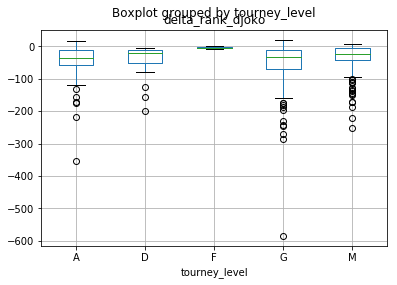

In [360]:
test_djoko.boxplot(by='tourney_level', column='delta_rank_djoko')

In [361]:
test_djoko = test_djoko[(test_djoko['winner_name'] == 'Novak Djokovic')].groupby(['tourney_year'], as_index=False).agg(['mean'])
test_djoko = test_djoko.reset_index()

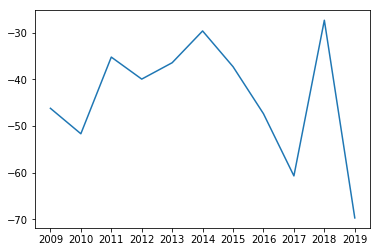

In [363]:
plt.plot(test_djoko['tourney_year'],test_djoko['delta_rank_djoko'])
# Attention : Il faut pondérer par le nombre de tournoi auxquels Djoko à participer

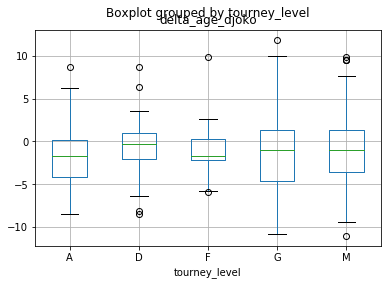

In [298]:
test_djoko.boxplot(by='tourney_level', column='delta_age_djoko')

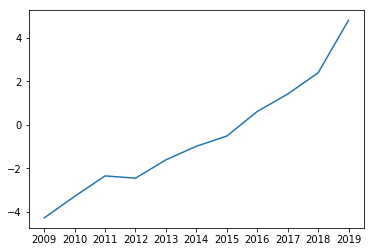

In [364]:
plt.plot(test_djoko['tourney_year'],test_djoko['delta_age_djoko'])

In [368]:
test_djoko_bis = test_djoko.groupby(['tourney_year'], as_index=False).agg(['count'])

AttributeError: 'SeriesGroupBy' object has no attribute 'cum'

In [367]:
test_djoko_bis

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,w_df,w_svpt,winner_age,winner_ht,winner_id,winner_rank,winner_rank_points,winner_seed,delta_rank_djoko,delta_age_djoko
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
tourney_year,,,,,,,,,,,,,,,,,,,,,
2009,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2010,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2011,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2013,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2014,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2015,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### On généralise pour tout les joueurs

In [487]:
test_all_players = df_10_last_years#.groupby(['tourney_year'], as_index=False).agg(['count'])


In [488]:
test_all_players.reset_index()

,index,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,...,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed,tourney_date_pt,tourney_year,year_mean_rank,year_mean_age
0,140055,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102839,ECU,Nicolas Lapentti,109.0,818.0,NaN,2009-03-06,2009,0,0
1,140056,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104433,CAN,Frank Dancevic,121.0,736.0,NaN,2009-03-06,2009,0,0
2,140057,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102839,ECU,Nicolas Lapentti,109.0,818.0,NaN,2009-03-06,2009,0,0
3,140058,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104117,ECU,Giovanni Lapentti,213.0,366.0,NaN,2009-03-06,2009,0,0
4,140059,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104268,COL,Alejandro Falla,211.0,368.0,NaN,2009-03-06,2009,0,0
5,140060,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105053,COL,Santiago Giraldo,140.0,599.0,NaN,2009-03-06,2009,0,0
6,140061,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104113,COL,Carlos Salamanca,271.0,267.0,NaN,2009-03-06,2009,0,0
7,140062,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108701,COL,Juan Sebastian Cabal,313.0,218.0,NaN,2009-03-06,2009,0,0
8,140063,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104292,RSA,Izak Van Der Merwe,284.0,255.0,NaN,2009-03-06,2009,0,0
9,140064,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103573,RSA,Rik De Voest,176.0,460.0,NaN,2009-03-06,2009,0,0


In [489]:
test_all_players_win_matches = df_10_last_years['winner_name'].groupby([df_10_last_years.winner_name.rename('player'), df_10_last_years.tourney_year.rename('year')]).agg('count')
#test_all_players = test_all_players.reset_index()

In [490]:
test_all_players_win_matches = test_all_players_win_matches.reset_index()

In [491]:
test_all_players_win_matches.head(5)

,player,year,winner_name
0,Abd Hazli Bin Zainuddin,2010,1
1,Abdullah Maqdas,2013,1
2,Abdullah Maqdas,2014,2
3,Abdullah Maqdas,2015,1
4,Adam Kellner,2009,1


In [493]:
test_all_players_win_matches_thresholded = test_all_players_win_matches[test_all_players_win_matches.winner_name>threshold]
test_all_players_win_matches_thresholded = test_all_players_win_matches_thresholded.reset_index()

In [494]:
# Debug
test_all_players_win_matches_thresholded.head(5)

,index,player,year,winner_name
0,15,Adrian Mannarino,2011,17
1,17,Adrian Mannarino,2013,10
2,18,Adrian Mannarino,2014,16
3,19,Adrian Mannarino,2015,28
4,20,Adrian Mannarino,2016,26


### On ajoute le rank moyen sur une année 

In [495]:
test_all_players_rank = df_10_last_years
test_all_players_rank['year_mean_rank'] = 0

C:\Users\aho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [496]:
test_all_players_rank_ok = test_all_players_rank['year_mean_rank'].groupby([test_all_players_rank.winner_name.rename('player'), df_10_last_years.tourney_year.rename('year'), df_10_last_years.winner_rank.rename('mean_rank')]).agg('mean')

In [497]:
test_all_players_rank_ok = test_all_players_rank_ok.reset_index()
test_all_players_rank_ok = test_all_players_rank_ok.drop('year_mean_rank',axis=1)
test_all_players_rank_ok.head(5)

,player,year,mean_rank
0,Abdullah Maqdas,2013,500.0
1,Abdullah Maqdas,2014,781.0
2,Abdullah Maqdas,2015,1695.0
3,Adam Kellner,2009,586.0
4,Adam Kellner,2010,321.0


### On ajoute l'age moyen sur une année (Il y a sans doute beaucoup mieux à faire comme calcul)

In [498]:
test_all_players_age = df_10_last_years
test_all_players_age['year_mean_age'] = 0

C:\Users\aho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [499]:
test_all_players_age_ok = test_all_players_age['year_mean_age'].groupby([df_10_last_years.winner_name.rename('player'), df_10_last_years.tourney_year.rename('year'), df_10_last_years.winner_age.rename('mean_age')]).agg('mean')

In [500]:
print(test_all_players_age_ok.shape)
test_all_players_age_ok = test_all_players_age_ok.reset_index()
test_all_players_age_ok = test_all_players_age_ok.drop('year_mean_age',axis=1)
test_all_players_age_ok.head(5)

(16547,)


,player,year,mean_age
0,Abd Hazli Bin Zainuddin,2010,29.68
1,Abdullah Maqdas,2013,25.84
2,Abdullah Maqdas,2014,26.84
3,Abdullah Maqdas,2015,28.30
4,Adam Kellner,2009,22.60


### On concataine les données 

In [501]:
test_all_players_merged_1 = pd.merge(test_all_players_win_matches, test_all_players_rank_ok, left_on = ['player','year'], right_on = ['player','year'], how = 'inner')

In [502]:
print(test_all_players_merged_1.shape)
test_all_players_merged_1 = test_all_players_merged_1.reset_index()

(12195, 4)


In [503]:
test_all_players_merged = pd.merge(test_all_players_merged_1, test_all_players_age_ok, left_on = ['player','year'], right_on = ['player','year'], how = 'inner')

In [504]:
test_all_players_merged = test_all_players_merged.reset_index()
test_all_players_merged.shape
test_all_players_merged = test_all_players_merged.drop('level_0',axis=1)

In [506]:
test_all_players_merged.head(15)

,index,player,year,winner_name,mean_rank,mean_age
0,0,Abdullah Maqdas,2013,1,500.0,25.84
1,1,Abdullah Maqdas,2014,2,781.0,26.84
2,2,Abdullah Maqdas,2015,1,1695.0,28.30
3,3,Adam Kellner,2009,1,586.0,22.60
4,4,Adam Kellner,2010,1,321.0,23.59
5,5,Adam Kellner,2011,2,249.0,24.59
6,5,Adam Kellner,2011,2,249.0,24.93
7,6,Adam Kellner,2011,2,333.0,24.59
8,6,Adam Kellner,2011,2,333.0,24.93
9,7,Adam Kellner,2012,1,346.0,25.68


### On sélectionne les joueurs qui ont un nombre de victoire supérieur à un seuil 

In [507]:
threshold = int(test_all_players_win_matches.winner_name.mean())
print('Le seuil est de :', threshold)

Le seuil est de : 9


In [511]:
test_all_players_merged_thresholded = test_all_players_merged[test_all_players_merged.winner_name>threshold]
test_all_players_merged_thresholded = test_all_players_merged.reset_index()
test_all_players_merged_thresholded = test_all_players_merged_thresholded.drop('level_0',axis=1)

In [514]:
# Debug

test_all_players_merged_thresholded.head(15)

,index,player,year,winner_name,mean_rank,mean_age
0,0,Abdullah Maqdas,2013,1,500.0,25.84
1,1,Abdullah Maqdas,2014,2,781.0,26.84
2,2,Abdullah Maqdas,2015,1,1695.0,28.30
3,3,Adam Kellner,2009,1,586.0,22.60
4,4,Adam Kellner,2010,1,321.0,23.59
5,5,Adam Kellner,2011,2,249.0,24.59
6,5,Adam Kellner,2011,2,249.0,24.93
7,6,Adam Kellner,2011,2,333.0,24.59
8,6,Adam Kellner,2011,2,333.0,24.93
9,7,Adam Kellner,2012,1,346.0,25.68


In [524]:
test_all_players_merged_thresholded[test_all_players_merged_thresholded['year']=='2016']

,index,player,year,winner_name,mean_rank,mean_age
10,8,Adam Pavlasek,2016,3,116.0,21.62
11,8,Adam Pavlasek,2016,3,116.0,21.78
12,9,Adam Pavlasek,2016,3,132.0,21.62
13,9,Adam Pavlasek,2016,3,132.0,21.78
481,55,Adrian Mannarino,2016,26,49.0,27.59
482,55,Adrian Mannarino,2016,26,49.0,27.63
483,55,Adrian Mannarino,2016,26,49.0,27.65
484,55,Adrian Mannarino,2016,26,49.0,27.69
485,55,Adrian Mannarino,2016,26,49.0,27.73
486,55,Adrian Mannarino,2016,26,49.0,27.88


# Prediction

In [556]:
# Paramètres fonction prédiction
annee_consecutive_joueur_1 = 1
annee_consecutive_joueur_2 = 1

delta_rank_negatif_joueur_1 = 10

delta_age_negatif_joueur_1 = 2

In [557]:
somme_pari = 10

In [545]:
part_1 = test_all_players_merged_thresholded[test_all_players_merged_thresholded['year'] == '2016']

In [546]:
part_2_joueur_1 = part_1[part_1['player']=='Adam Pavlasek']

In [549]:
part_2_joueur_2 = part_1[part_1['player']=='Adrian Mannarino']


In [550]:
stat_joueur_1 = part_2_joueur_1.tail(1)
stat_joueur_2 = part_2_joueur_2.tail(1)

In [552]:
stat_joueur_1

,index,player,year,winner_name,mean_rank,mean_age
13,9,Adam Pavlasek,2016,3,132.0,21.78


In [553]:
stat_joueur_2

,index,player,year,winner_name,mean_rank,mean_age
667,65,Adrian Mannarino,2016,26,67.0,28.3


In [620]:
def joueur_1_gagne(nom_joueur_1, nom_joueur_2,annee,annee_consecutive_joueur_1,annee_consecutive_joueur_2,delta_rank_negatif_joueur_1,delta_age_negatif_joueur_1):
    
    # Init
    score = 0
    reply = 'Joueur 1'
    
    part_1 = test_all_players_merged_thresholded[test_all_players_merged_thresholded['year'] == str(annee)]
    part_2_joueur_1 = part_1[part_1['player']==nom_joueur_1]
    part_2_joueur_2 = part_1[part_1['player']==nom_joueur_2]
    
    stat_joueur_1 = part_2_joueur_1.tail(1)
    stat_joueur_2 = part_2_joueur_2.tail(1)
    
    age_joueur_1 = int(stat_joueur_1['mean_age'])
    age_joueur_2 = int(stat_joueur_2['mean_age'])
    
    rank_joueur_1 = int(stat_joueur_1['mean_rank'])
    rank_joueur_2 = int(stat_joueur_2['mean_rank'])
    
    delta_age = (age_joueur_1 - age_joueur_2)
    delta_rank = (rank_joueur_1 - rank_joueur_2)
    
    
    # Compute score
    cond_1 = (delta_age - delta_age_negatif_joueur_1 > 0)
    
    
    print(cond_1)
    if (cond_1):
        score = score + 1
    else:
        score = score - 1
    
    
    cond_2 = (delta_rank - delta_rank_negatif_joueur_1 > 0)
    if (cond_2):
        score = score + 1
    else:
        score = score - 1
    
    if(score<0):
        reply = 'Joueur 2'
    
    if(score>=0):
        reply = 'Joueur 1'
    
    return(reply)

In [621]:
joueur_1_gagne('Novak Djokovic','Adam Pavlasek',2017,annee_consecutive_joueur_1=2,annee_consecutive_joueur_2=1,delta_rank_negatif_joueur_1=10,delta_age_negatif_joueur_1=1)

True


'Joueur 1'